اضافه کردن کتابخانه‌های مورد نیاز

In [1]:
import numpy as np
import matplotlib.pyplot as plt

با کتابخانه‌ی
`numpy`
آرایه‌ی 
`population`
را از فایل می‌خوانیم.

In [2]:
population = np.load('population.npy')

In [3]:
population

array([29.72244329, 40.25708212,  5.08417193, ..., 42.51121103,
       62.68494813, 81.23451059])

نمودار توزیع آن را رسم می‌کنیم

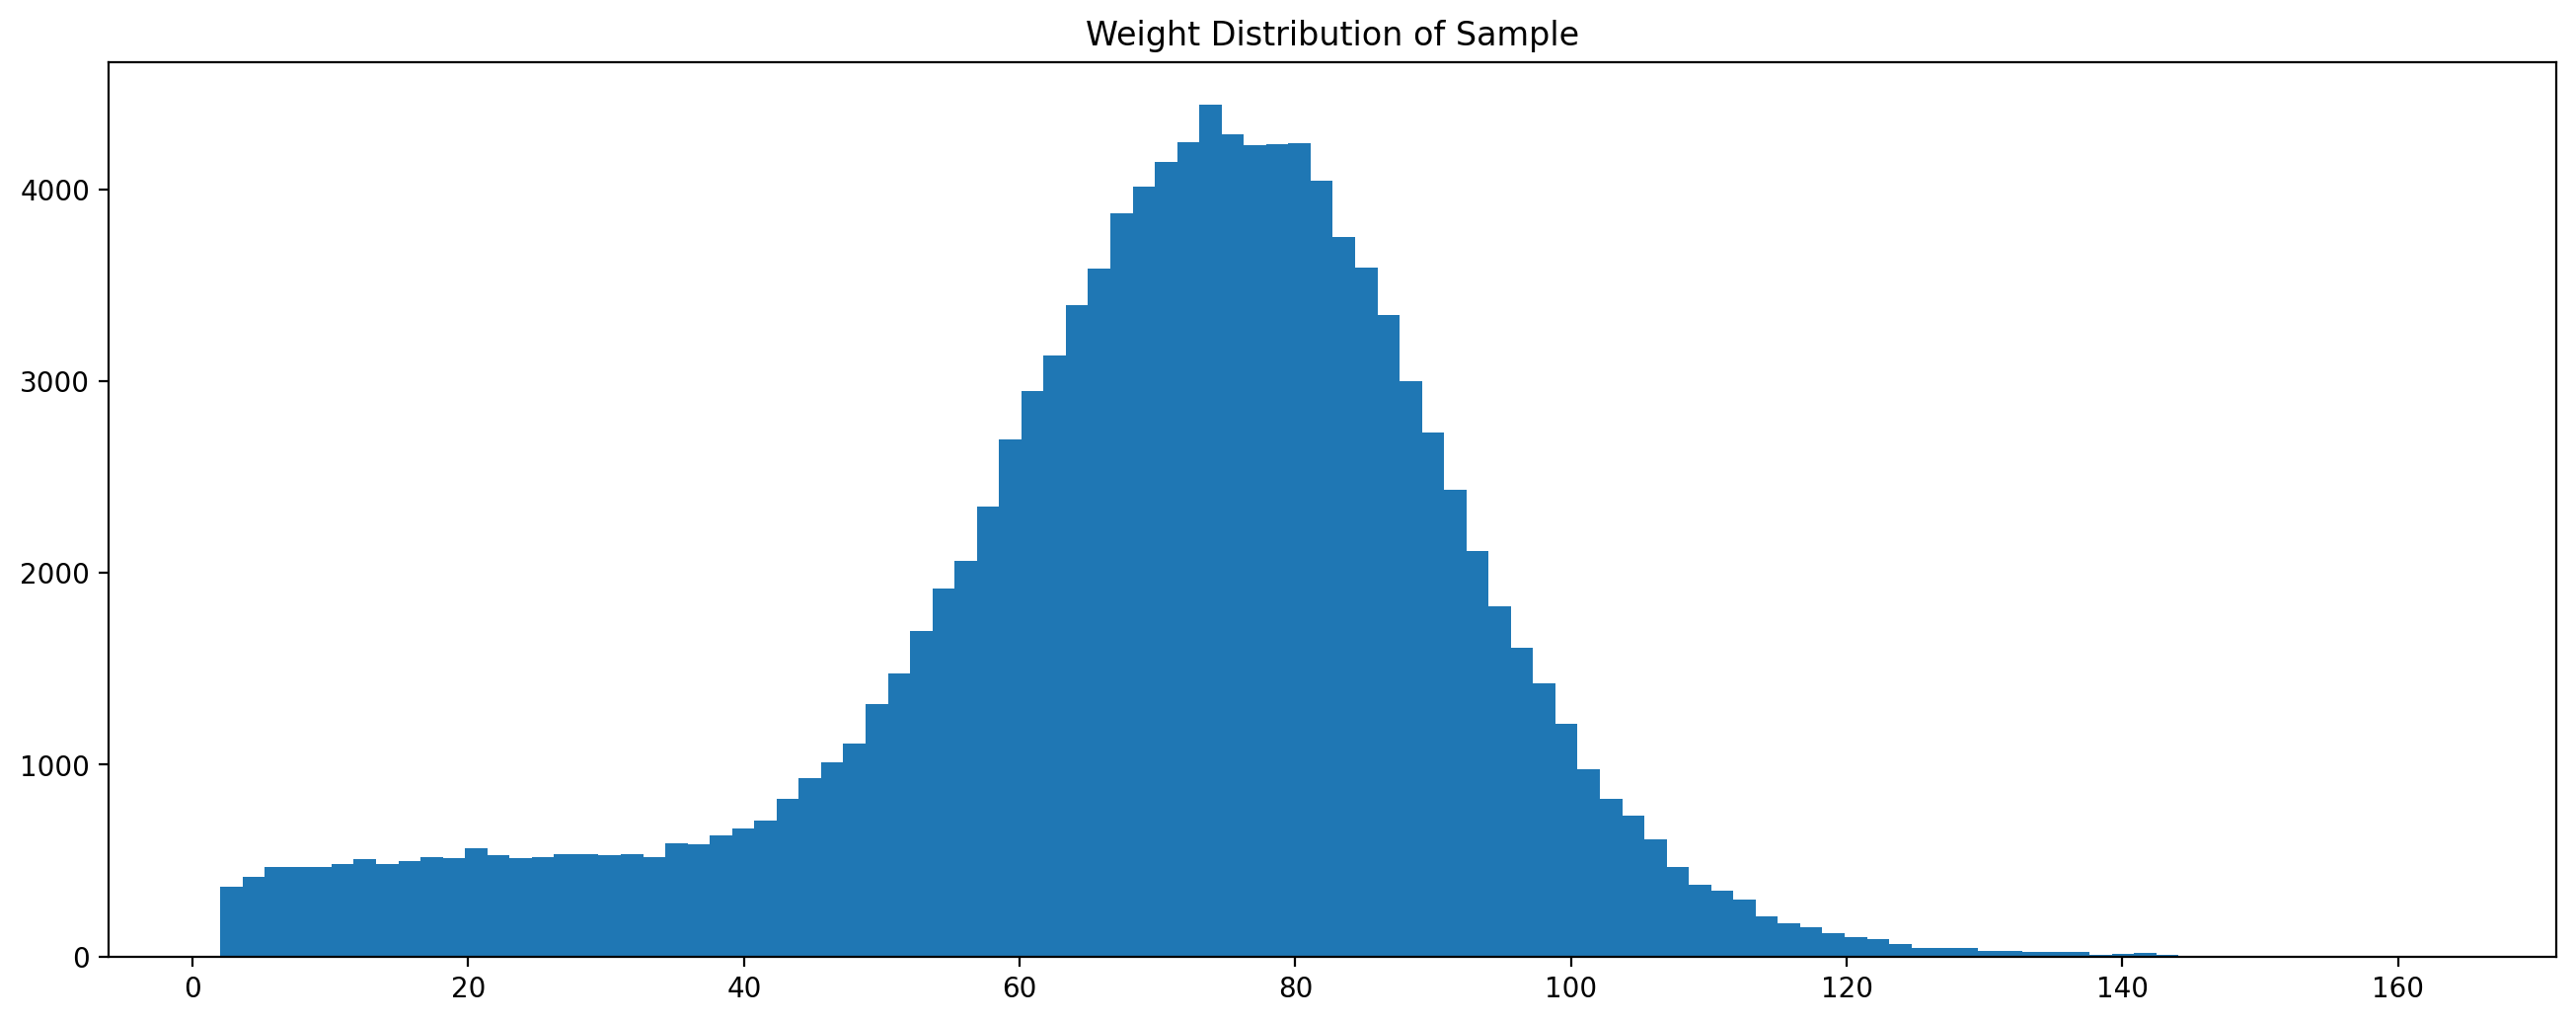

In [4]:
# hist
plt.figure(figsize = (16,6),dpi=200)
plt.hist(population,bins = 100)
plt.title("Weight Distribution of Sample")
plt.show()

تابع توزیع تجمعی آن را رسم می‌کنیم

In [5]:
population_sorted = np.sort(population)
y = np.arange(1 , len(population)+1) / len(population)

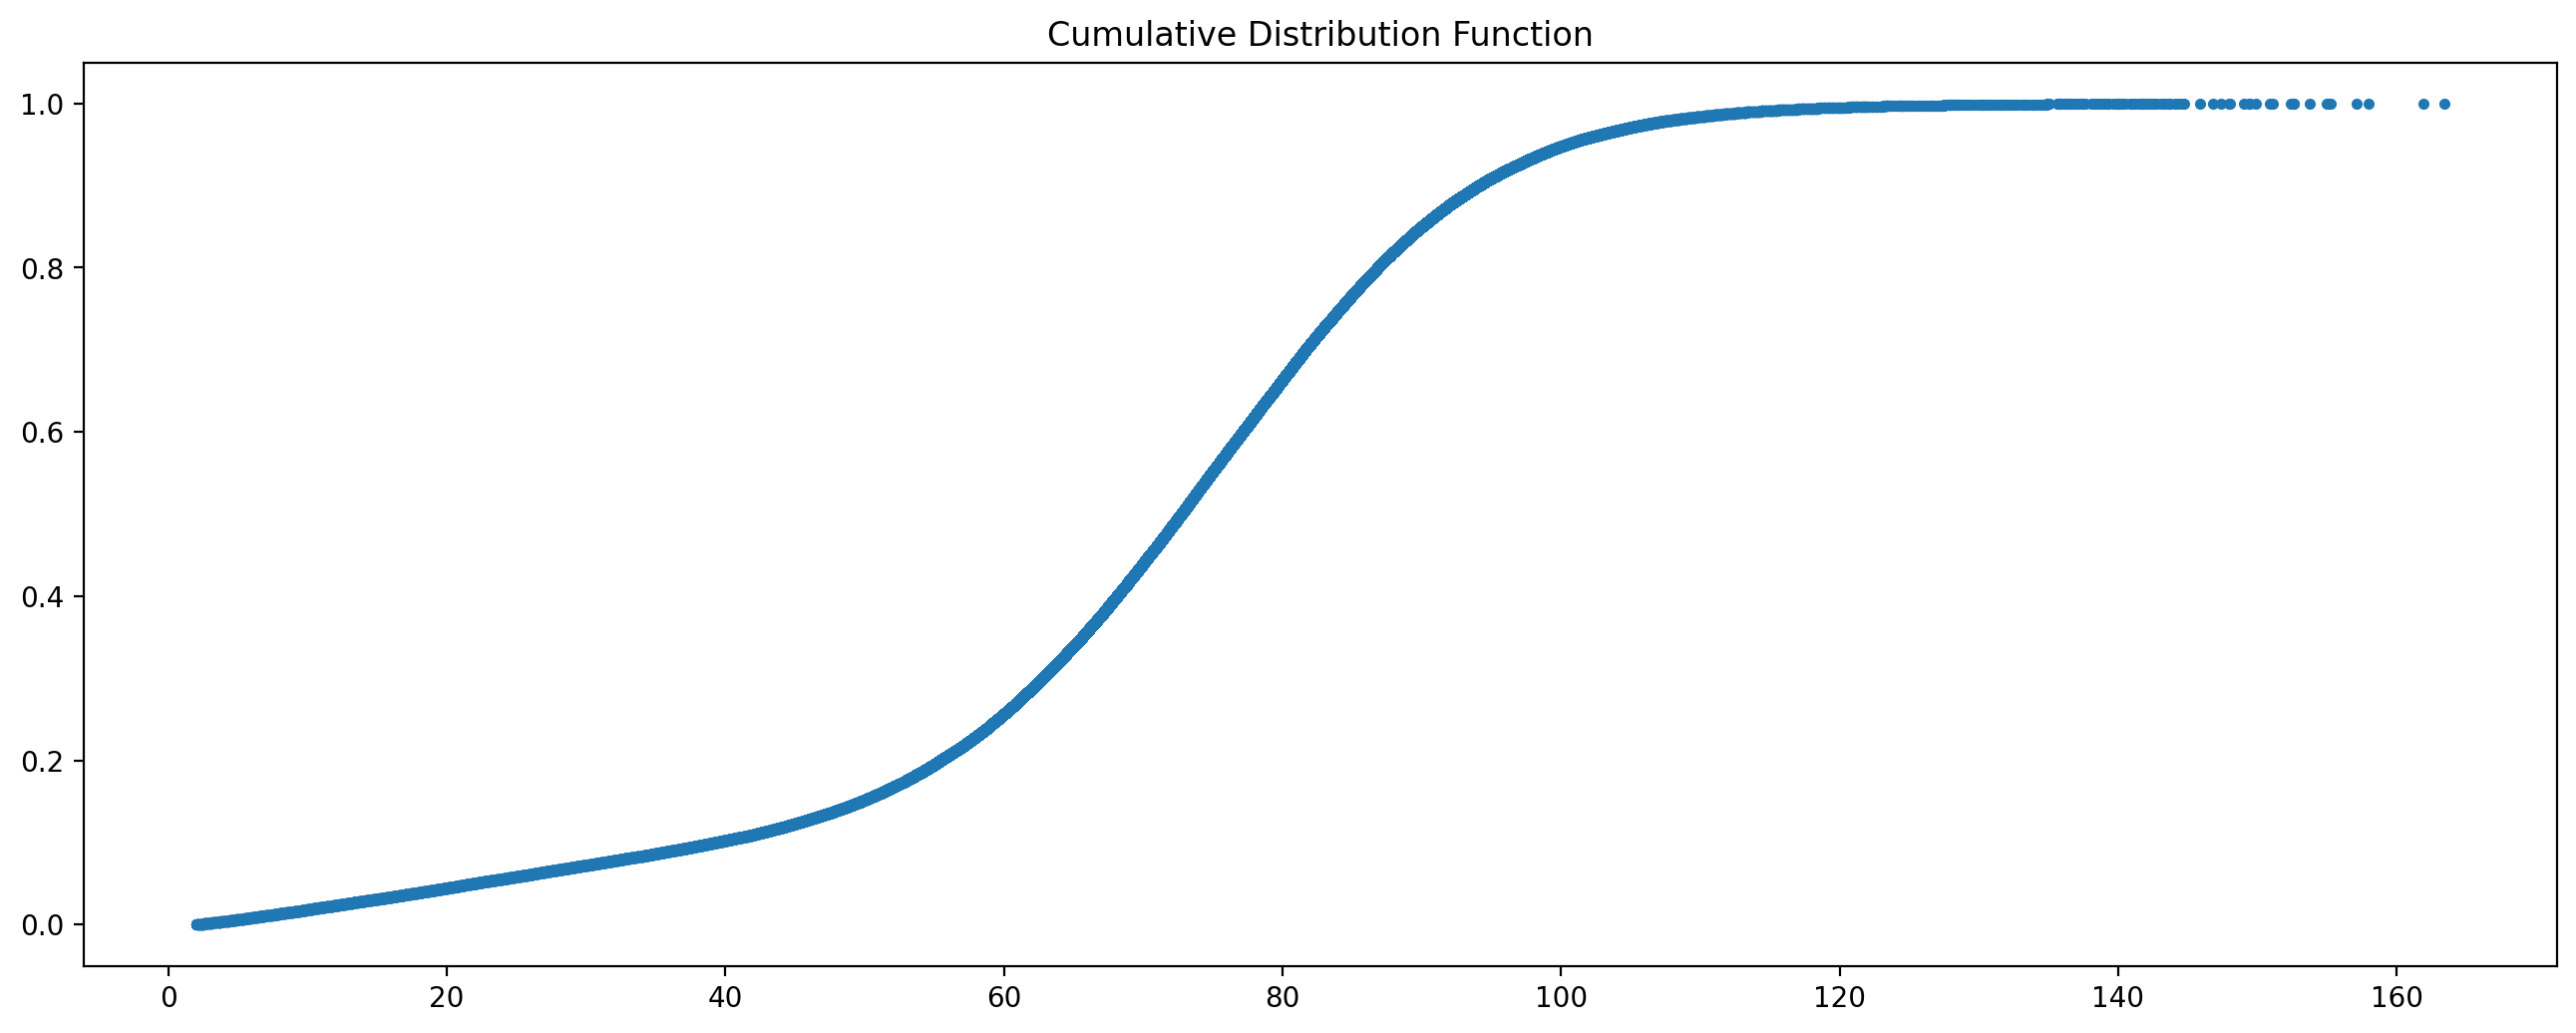

In [6]:
# cdf
plt.figure(figsize=(16,6),dpi=200)
plt.plot(population_sorted,y,'.',linestyle = 'none')
plt.title("Cumulative Distribution Function")
plt.show()

یک توزیع نرمال با میانگین و واریانسی برابر با 
`population`
تولید می‌کنیم.
(به وسیله‌ی `np.random.normal`)
و در متغیر `normal_dist`
ذخیره می‌کنیم

In [7]:
mu = np.mean(population)
sigma = np.var(population)
size = np.size(population)
print(mu, sigma, size)

69.774151637529 493.64740639137204 118297


In [8]:
normal_dist = np.random.normal(mu, sigma, size)
normal_dist

array([ 224.13012992,  750.56253102,  343.90570027, ..., -769.70432784,
        -95.78772209, -212.50325973])

تابع توزیع تجمعی را برای
`normal_dist`
و
`population`
در کنار هم رسم می‌کنیم

In [9]:
normal_dist_sorted = np.sort(normal_dist)
y_normal_dist = np.arange(1 , len(normal_dist)+1) / len(normal_dist)

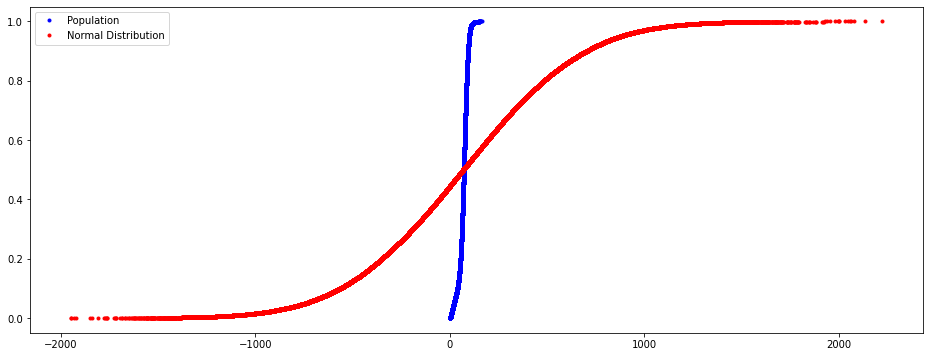

In [10]:
plt.figure(figsize = (16,6))
plt.plot(population_sorted,y,'.',c = 'blue',linestyle = 'none',label= 'Population')
plt.plot(normal_dist_sorted,y_normal_dist,'.',c = 'red',linestyle = 'none',label = 'Normal Distribution')
plt.legend()
plt.show()

میانگین اختلاف دو توزیع معیار مناسبی برای فاصله‌ی آنهاست.
تابع زیر را طوری تکمیل کنید که دو توزیع را بگیرد و فاصله‌ی آنها را حساب کند.
سپس آن را در فایل
`dists_diff.py`
ذخیره کنید.

پس از تکمیل و اجرای تابع می‌توانید کد زیر را در خط اول سلول پایین قرار دهید تا خودش کد آن را در فایل ثبت کند.

`%%writefile dists_diff.py`

In [16]:
def dists_diff(dist_1,dist_2):
    return np.mean(np.abs(dist_1 - dist_2))

تابع را امتحان می‌کنیم

In [12]:
print(dists_diff(population,normal_dist))

394.3765817339431


In [13]:
diff = dists_diff(population,normal_dist)

کد زیر را اجرا کنید تا 
`normal_dist`
و
`diff`
را در فایل ذخیره کند و آن را ارسال کنید. 

In [17]:
#dumper script
np.savez('result_dist.npz',normal_dist=normal_dist,diff=diff)
import zlib
import zipfile

def compress(file_names):
    print("File Paths:")
    print(file_names)

    # Select the compression mode ZIP_DEFLATED for compression
    # or zipfile.ZIP_STORED to just store the file
    compression = zipfile.ZIP_DEFLATED

    # create the zip file first parameter path/name, second mode
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            # Add file to the zip file
            # first parameter file to zip, second filename in zip
            zf.write('./'+file_name, file_name, compress_type=compression)


file_names= ["result_dist.npz","dists_diff.py", "solution.ipynb"]
compress(file_names)

File Paths:
['result_dist.npz', 'dists_diff.py', 'solution.ipynb']
